# Notebook de Análise Quantitativa de Investimentos.

## 1º Preparando o Ambiente

In [307]:
# Baixando a biblioteca de integração.
!pip install wbdata python-bcb plotly ipeadatapy yfinance fundamentus bt --quiet

In [393]:
# Importando bibliotecas necessárioas.
#------------ DADOS ----------------#
import pandas_datareader as pdr
import pandas as pd
import numpy as np

#------------ GRÁFICOS -------------#
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#------------ API's ----------------#
import ipeadatapy as ip
import yfinance as yf
import wbdata as wb
import fundamentus as fn
from bcb import sgs

#--------- ESTATÍSTICA -------------#
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#------------- TEMPO ---------------#
from datetime import datetime

#----------- BACKTEST --------------#
import bt

In [309]:
# Definindo Máximo do Linhas e Colunas.
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [310]:
# Removendo Warnings.
import warnings
warnings.filterwarnings("ignore")

## 2º Extraindo Dados

In [311]:
# Definindo Periodos de Análise YYYY-mm-dd.
inicio = '2015-01-01'
final = datetime.today().strftime('%Y-%m-%d')

### Dados Bolsa Brasileira - Ibovespa

In [312]:
# Extraindo dados de interesse.
ibov = yf.download('^BVSP', inicio, final, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [313]:
# Visualizando dados.
display(ibov.head(5).round(2))
display(ibov.tail(5).round(2))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,49943.0,3621900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-09,114169.0,115219.0,113448.0,115156.0,115156.0,9474400
2023-10-10,115158.0,116900.0,115158.0,116737.0,116737.0,11621500
2023-10-11,116737.0,117099.0,116231.0,117051.0,117051.0,9949800
2023-10-13,117050.0,117070.0,115658.0,115754.0,115754.0,10609300
2023-10-16,115760.0,116905.0,115760.0,116534.0,116534.0,8989900


In [314]:
# Dimensão dos dados.
ibov.shape

(2178, 6)

In [315]:
# Caracteristicas dos dados.
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2178 entries, 2015-01-02 to 2023-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2178 non-null   float64
 1   High       2178 non-null   float64
 2   Low        2178 non-null   float64
 3   Close      2178 non-null   float64
 4   Adj Close  2178 non-null   float64
 5   Volume     2178 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.1 KB


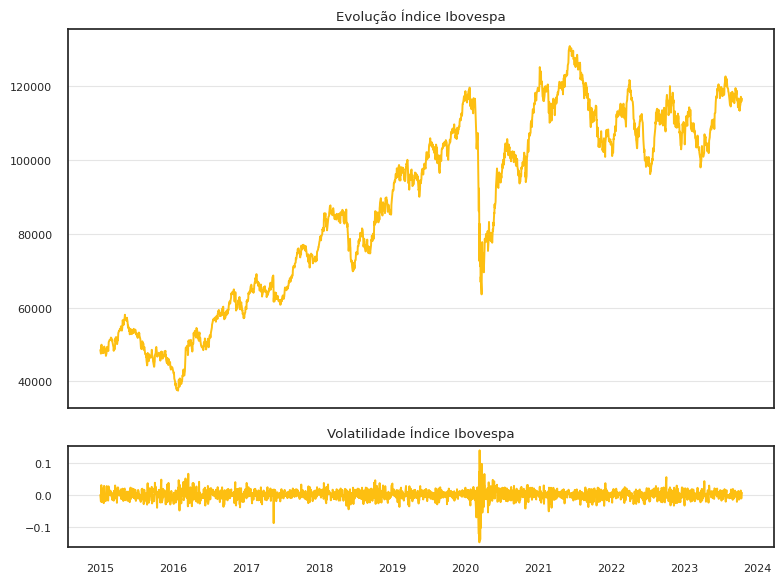

In [316]:
# Visualizando gráfico de dados.

plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

plot1 = plt.subplot2grid((4,1), (0, 0), colspan=4, rowspan=3)
plot1.set_title('Evolução Índice Ibovespa')
plot1.plot(ibov.index, ibov['Adj Close'], color='#fdbf11')
plot1.grid(axis='y', linestyle='-', alpha=0.5)
plot1.xaxis.set_ticks_position('none')
plot1.yaxis.set_ticks_position('none')
plot1.spines['top'].set_visible(True)
plot1.spines['right'].set_visible(True)
plot1.spines['bottom'].set_visible(True)
plot1.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)
plot1.set_xticklabels([])

plot2 = plt.subplot2grid((4,1), (3, 0), colspan=1, rowspan=3)
plot2.set_title('Volatilidade Índice Ibovespa')
plot2.plot(ibov.index, ibov['Adj Close'].pct_change().fillna(0), color='#fdbf11')
plot2.grid(axis='y', linestyle='-', alpha=0.5)
plot2.xaxis.set_ticks_position('none')
plot2.yaxis.set_ticks_position('none')
plot2.spines['top'].set_visible(True)
plot2.spines['right'].set_visible(True)
plot2.spines['bottom'].set_visible(True)
plot2.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

## 3º Volatilidade da Série.

In [317]:
sma22 = ibov['Adj Close'].rolling(window=22).mean()
volsma22 = ibov['Adj Close'].pct_change().fillna(0).rolling(window=22).mean()

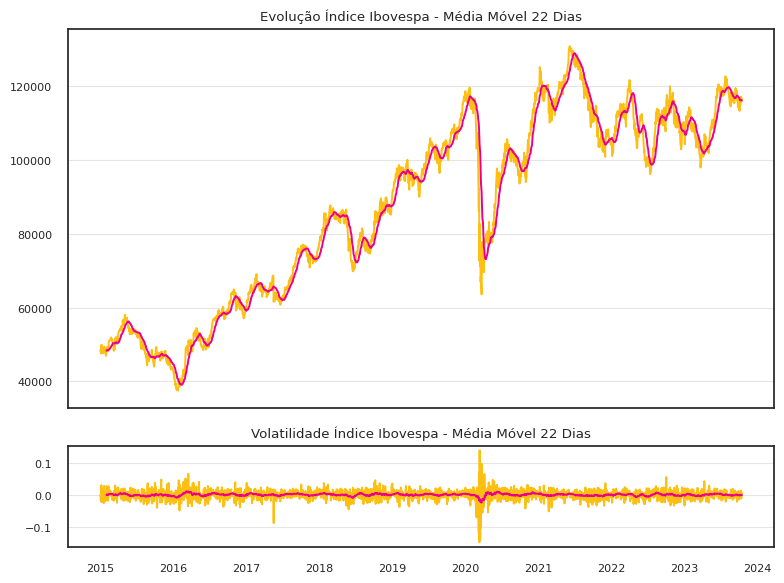

In [318]:
# Visualizando gráfico de dados.

plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

plot1 = plt.subplot2grid((4,1), (0, 0), colspan=4, rowspan=3)
plot1.set_title('Evolução Índice Ibovespa - Média Móvel 22 Dias')
plot1.plot(ibov.index, ibov['Adj Close'], color='#fdbf11')
plot1.plot(ibov.index, sma22, color='#ec008b')
plot1.grid(axis='y', linestyle='-', alpha=0.5)
plot1.xaxis.set_ticks_position('none')
plot1.yaxis.set_ticks_position('none')
plot1.spines['top'].set_visible(True)
plot1.spines['right'].set_visible(True)
plot1.spines['bottom'].set_visible(True)
plot1.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)
plot1.set_xticklabels([])

plot2 = plt.subplot2grid((4,1), (3, 0), colspan=1, rowspan=3)
plot2.set_title('Volatilidade Índice Ibovespa - Média Móvel 22 Dias')
plot2.plot(ibov.index, ibov['Adj Close'].pct_change().fillna(0), color='#fdbf11')
plot2.plot(ibov.index, volsma22, color='#ec008b')
plot2.grid(axis='y', linestyle='-', alpha=0.5)
plot2.xaxis.set_ticks_position('none')
plot2.yaxis.set_ticks_position('none')
plot2.spines['top'].set_visible(True)
plot2.spines['right'].set_visible(True)
plot2.spines['bottom'].set_visible(True)
plot2.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [319]:
smsd22 = ibov['Adj Close'].rolling(window=22).std()
volsmsd22 = ibov['Adj Close'].pct_change().fillna(0).rolling(window=22).std()

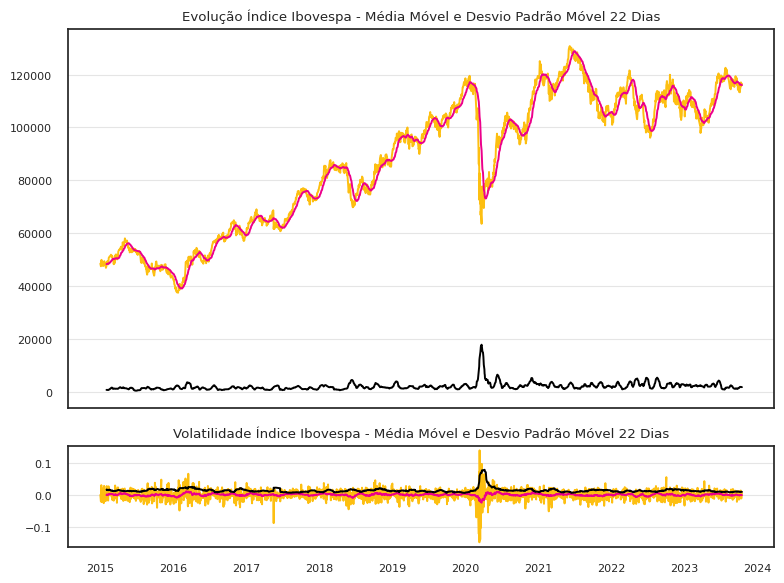

In [320]:
# Visualizando gráfico de dados.

plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

plot1 = plt.subplot2grid((4,1), (0, 0), colspan=4, rowspan=3)
plot1.set_title('Evolução Índice Ibovespa - Média Móvel e Desvio Padrão Móvel 22 Dias')
plot1.plot(ibov.index, ibov['Adj Close'], color='#fdbf11')
plot1.plot(ibov.index, sma22, color='#ec008b')
plot1.plot(ibov.index, smsd22, color='#000000')
plot1.grid(axis='y', linestyle='-', alpha=0.5)
plot1.xaxis.set_ticks_position('none')
plot1.yaxis.set_ticks_position('none')
plot1.spines['top'].set_visible(True)
plot1.spines['right'].set_visible(True)
plot1.spines['bottom'].set_visible(True)
plot1.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)
plot1.set_xticklabels([])

plot2 = plt.subplot2grid((4,1), (3, 0), colspan=1, rowspan=3)
plot2.set_title('Volatilidade Índice Ibovespa - Média Móvel e Desvio Padrão Móvel 22 Dias')
plot2.plot(ibov.index, ibov['Adj Close'].pct_change().fillna(0), color='#fdbf11')
plot2.plot(ibov.index, volsma22, color='#ec008b')
plot2.plot(ibov.index, volsmsd22, color='#000000')
plot2.grid(axis='y', linestyle='-', alpha=0.5)
plot2.xaxis.set_ticks_position('none')
plot2.yaxis.set_ticks_position('none')
plot2.spines['top'].set_visible(True)
plot2.spines['right'].set_visible(True)
plot2.spines['bottom'].set_visible(True)
plot2.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

In [321]:
retorno = ibov['Adj Close'].pct_change().fillna(0)
retorno_cum =  (1 + retorno).cumprod()

In [322]:
ewm22 = ibov['Adj Close'].ewm(22).std()

In [323]:
def parkinson_vol(high_df, low_df, period=22):
    x = np.log(np.divide(high_df, low_df)) ** 2
    pv = x.copy()
    const = 1 / (4 * period * np.log(2))
    pv.iloc[:period] = np.nan
    for row in range(period, len(high_df)):
        pv.iloc[row] = np.sqrt(const * np.sum(x.iloc[row-period:row]))
    return pv

volpark22 = parkinson_vol(ibov["High"], ibov["Low"], 22)

In [324]:
def garman_klass_vol(high_df, low_df, close_df, open_df, period=22):
    x_hl = (1/2)*(np.log(np.divide(high_df, low_df))) ** 2
    x_co = - (2 * np.log(2) - 1) * \
        (np.log(np.divide(close_df, open_df))**2)
    x = x_hl + x_co.values
    gk = x.copy()
    const = 1/period
    gk.iloc[:period] = np.nan
    for row in range(period, len(high_df)):
        gk.iloc[row] = np.sqrt(const * np.sum(x.iloc[row-period:row]))
    return gk

volgk22 = garman_klass_vol(ibov["High"], ibov["Low"], ibov["Close"], ibov["Open"], 22)

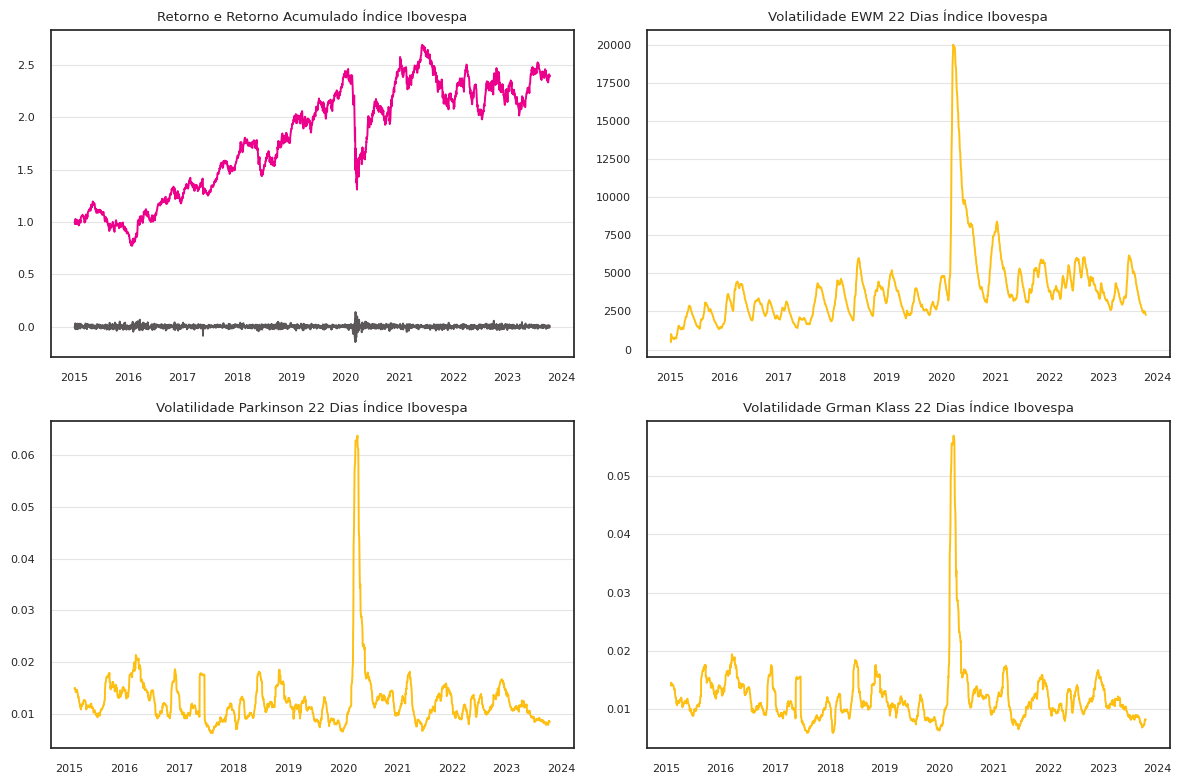

In [325]:
# Visualizando gráfico de dados.

plt.style.use('seaborn-paper')
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)

plt.title('Retorno e Retorno Acumulado Índice Ibovespa')
plt.plot(ibov.index, retorno_cum, color='#ec008b')
plt.plot(ibov.index, retorno, color='#5c5859')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.subplot(2,2,2)

plt.title('Volatilidade EWM 22 Dias Índice Ibovespa')
plt.plot(ibov.index, ewm22, color='#fdbf11')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.subplot(2,2,3)

plt.title('Volatilidade Parkinson 22 Dias Índice Ibovespa')
plt.plot(ibov.index, volpark22, color='#fdbf11')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.subplot(2,2,4)

plt.title('Volatilidade Grman Klass 22 Dias Índice Ibovespa')
plt.plot(ibov.index, volgk22, color='#fdbf11')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()

## 4º Calculando VaR (Value at Risk)

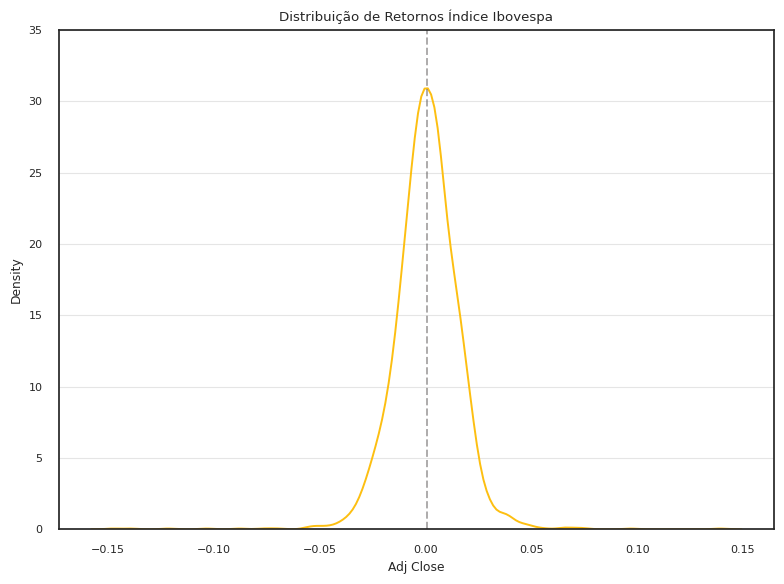

In [326]:
# Visualizando gráfico de dados.

plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

plt.title('Distribuição de Retornos Índice Ibovespa')
sns.kdeplot(retorno, color='#fdbf11')
plt.vlines(retorno.mean(), 0, 35, linestyle='--', alpha=0.5, color='#5c5859')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.ylim(0,35)

plt.tight_layout()
plt.show()

In [327]:
print('Distribuição de Retornos Índice Ibovespa com Média:', retorno.mean().round(4)*100, '%')

Distribuição de Retornos Índice Ibovespa com Média: 0.05 %


In [328]:
def value_at_risk(valor_investido, retornos, alpha = 0.95):
    return np.percentile(retornos, 100 * (1-alpha)) * valor_investido

In [329]:
valor_investido = 1000
portfolio_var = value_at_risk(valor_investido = valor_investido, retornos = retorno)
portfolio_var_return = portfolio_var / valor_investido

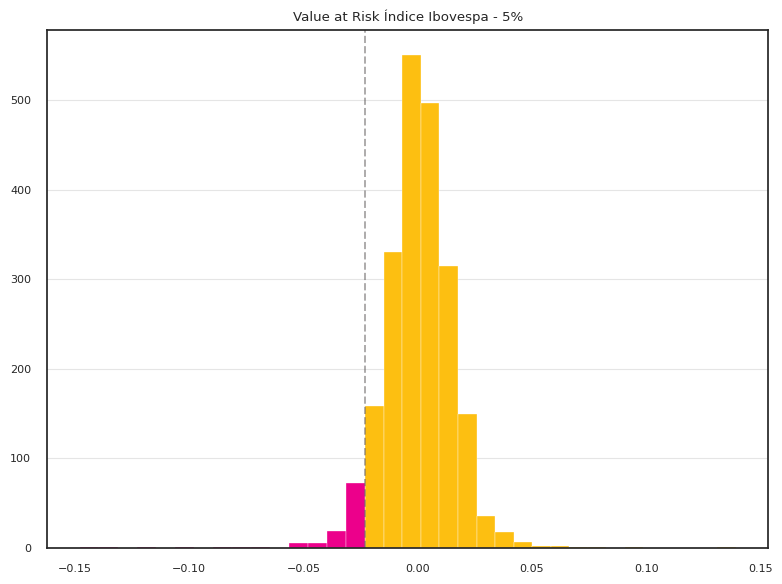

In [330]:
# Visualizando gráfico de dados.

plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

plt.title('Value at Risk Índice Ibovespa - 5%')
plt.hist(retorno[retorno > portfolio_var_return], bins=20, color='#fdbf11')
plt.hist(retorno[retorno < portfolio_var_return], bins=15,  color='#ec008b')
plt.axvline(portfolio_var_return, linestyle='--', alpha=0.5, color='#5c5859')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()

In [331]:
print('Value at Risk Índice Ibovespa - 5%', round(portfolio_var_return, 4)*100, '%')

Value at Risk Índice Ibovespa - 5% -2.29 %


## 5º Portifólio e Otimização.

In [332]:
ativos = ['SMAL11.SA','BOVA11.SA','IVVB11.SA']

In [333]:
carteira = yf.download(ativos, inicio, final, interval='1d')['Adj Close']
display(carteira.head())
display(carteira.tail())

[*********************100%%**********************]  3 of 3 completed


,BOVA11.SA,IVVB11.SA,SMAL11.SA
Date,,,
2015-01-02,47.259998,55.799999,52.020000
2015-01-05,46.320000,55.750000,50.549999
2015-01-06,46.580002,54.849998,50.000000
2015-01-07,48.150002,55.169998,51.250000
2015-01-08,48.509998,55.799999,52.000000


,BOVA11.SA,IVVB11.SA,SMAL11.SA
Date,,,
2023-10-09,111.739998,246.699997,98.000000
2023-10-10,113.129997,244.289993,100.099998
2023-10-11,113.500000,245.300003,99.900002
2023-10-13,112.059998,244.050003,97.000000
2023-10-16,112.940002,244.199997,98.300003


In [334]:
volcarteira = carteira.pct_change().dropna()
display(volcarteira.head())
display(volcarteira.tail())

,BOVA11.SA,IVVB11.SA,SMAL11.SA
Date,,,
2015-01-05,-0.019890,-0.000896,-0.028258
2015-01-06,0.005613,-0.016144,-0.010880
2015-01-07,0.033705,0.005834,0.025000
2015-01-08,0.007477,0.011419,0.014634
2015-01-09,-0.020202,-0.018817,-0.019231


,BOVA11.SA,IVVB11.SA,SMAL11.SA
Date,,,
2023-10-09,0.009760,0.000000,0.014808
2023-10-10,0.012440,-0.009769,0.021429
2023-10-11,0.003271,0.004134,-0.001998
2023-10-13,-0.012687,-0.005096,-0.029029
2023-10-16,0.007853,0.000615,0.013402


In [335]:
CovMatrix = volcarteira.cov()

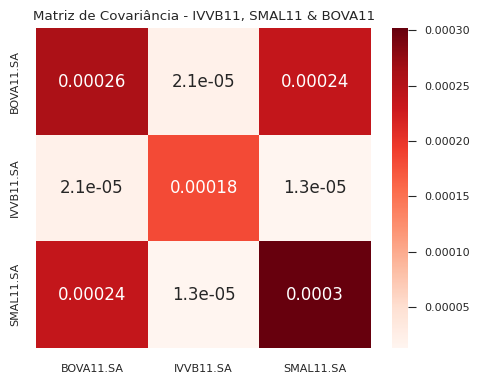

In [336]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(5,4))

plt.title('Matriz de Covariância - IVVB11, SMAL11 & BOVA11')
sns.heatmap(CovMatrix, cmap = 'Reds', annot = True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.tight_layout()

plt.show()

In [337]:
NumAtivos = len(ativos)
NumPortifolios = 1000

In [338]:
Resultados = []

In [339]:
for _ in range(NumPortifolios):
    Weights = np.random.random(NumAtivos)
    Weights /= np.sum(Weights)
    Rep = np.sum(volcarteira.mean() * Weights) * 252
    Rscep = np.sqrt(np.dot(Weights.T, np.dot(CovMatrix * 252, Weights)))
    Resultados.append([Rep, Rscep, Weights])

In [340]:
Resultados = pd.DataFrame(Resultados, columns=['Return', 'Risk', 'Weights'])
Sharpe = (Resultados['Return'] - 0.02) / Resultados['Risk']
Best = Resultados.iloc[Sharpe.idxmax()]

In [341]:
Pesos = []

print("Alocação Ótima:")
for Asset, Weight in zip(volcarteira.columns, Best['Weights']):
    print(f"{Asset}: {Weight*100:.2f}%")
    Pesos.append(Weight)
print(f"Retorno Esperado da Carteira: {Best['Return']*100:.2f}%")
print(f"Risco da Carteira (Desvio Padrão): {Best['Risk']*100:.2f}%")

Alocação Ótima:
BOVA11.SA: 29.87%
IVVB11.SA: 69.62%
SMAL11.SA: 0.51%
Retorno Esperado da Carteira: 17.67%
Risco da Carteira (Desvio Padrão): 17.42%


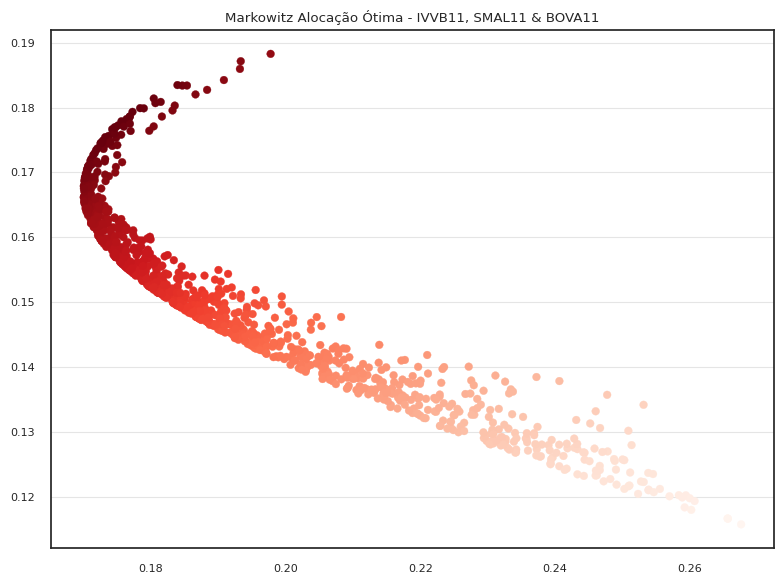

In [342]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-paper')

plt.title('Markowitz Alocação Ótima - IVVB11, SMAL11 & BOVA11')
plt.scatter(Resultados['Risk'], Resultados['Return'], c=Sharpe, cmap='Reds')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()

## 6° Carteira

In [343]:
carteira_normalizada = pd.DataFrame()

In [344]:
carteira_normalizada['BOVA11'] = (carteira['BOVA11.SA'] / carteira['BOVA11.SA'].iloc[0]) *  Pesos[0]
carteira_normalizada['BOVA11'].dropna(inplace=True)
carteira_normalizada['IVVB11'] = (carteira['IVVB11.SA'] / carteira['IVVB11.SA'].iloc[0]) * Pesos[1]
carteira_normalizada['IVVB11'].dropna(inplace=True)
carteira_normalizada['SMAL11'] = (carteira['SMAL11.SA'] / carteira['SMAL11.SA'].iloc[0]) * Pesos[2]
carteira_normalizada['SMAL11'].dropna(inplace=True)

In [345]:
carteira_normalizada["PORT11"] = carteira_normalizada.sum(axis=1)

In [346]:
carteira_normalizada['BOVA11'] = (carteira['BOVA11.SA'] / carteira['BOVA11.SA'].iloc[0])
carteira_normalizada['BOVA11'].dropna(inplace=True)
carteira_normalizada['IVVB11'] = (carteira['IVVB11.SA'] / carteira['IVVB11.SA'].iloc[0])
carteira_normalizada['IVVB11'].dropna(inplace=True)
carteira_normalizada['SMAL11'] = (carteira['SMAL11.SA'] / carteira['SMAL11.SA'].iloc[0])
carteira_normalizada['SMAL11'].dropna(inplace=True)

In [347]:
display(carteira_normalizada.head())
display(carteira_normalizada.tail())

,BOVA11,IVVB11,SMAL11,PORT11
Date,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.980110,0.999104,0.971742,0.993292
2015-01-06,0.985612,0.982975,0.961169,0.983652
2015-01-07,1.018832,0.988710,0.985198,0.997690
2015-01-08,1.026449,1.000000,0.999616,1.007899


,BOVA11,IVVB11,SMAL11,PORT11
Date,,,,
2023-10-09,2.364367,4.421147,1.883891,3.793906
2023-10-10,2.393779,4.377957,1.924260,3.772826
2023-10-11,2.401608,4.396057,1.920415,3.787747
2023-10-13,2.371138,4.373656,1.864667,3.762766
2023-10-16,2.389759,4.376344,1.889658,3.770327


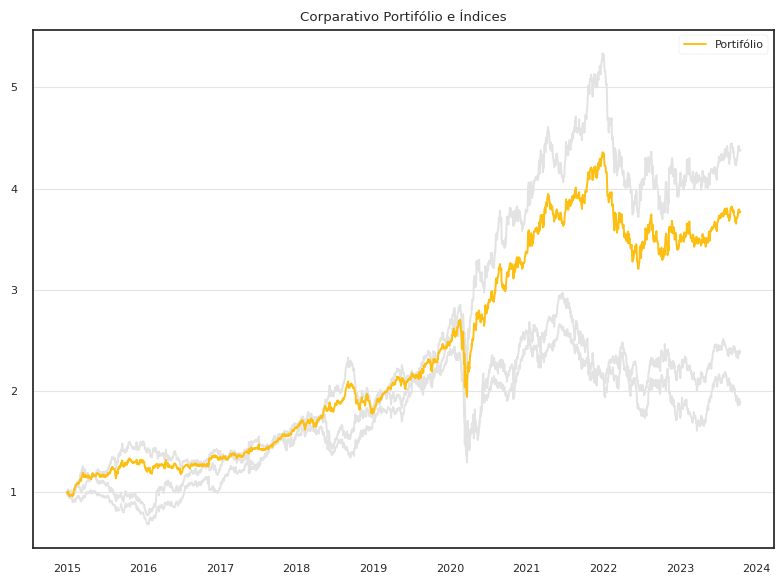

In [348]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-paper')

plt.title('Corparativo Portifólio e Índices')
plt.plot(carteira_normalizada.index, carteira_normalizada[['BOVA11','SMAL11','IVVB11']], color='#e3e3e3')
plt.plot(carteira_normalizada.index, carteira_normalizada['PORT11'], color='#fdbf11', label='Portifólio')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.legend()
plt.tight_layout()
plt.show()

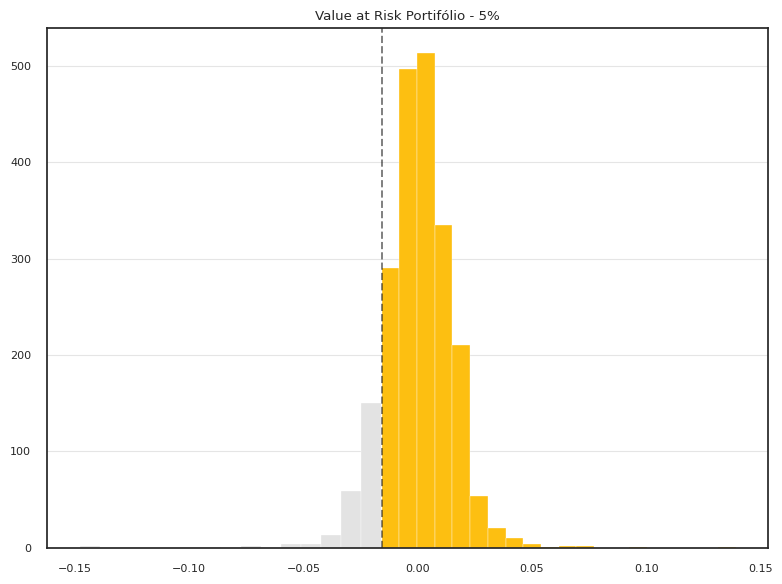

Value at Risk Índice Ibovespa - 5% -2.0 %


In [349]:
valor_investido = 1000
portfolio_var = value_at_risk(valor_investido = valor_investido, retornos = carteira_normalizada['PORT11'].pct_change().dropna())
portfolio_var_return = portfolio_var / valor_investido

plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

plt.title('Value at Risk Portifólio - 5%')
plt.hist(retorno[retorno > portfolio_var_return], bins=20, color='#fdbf11')
plt.hist(retorno[retorno < portfolio_var_return], bins=15,  color='#e3e3e3')
plt.axvline(portfolio_var_return, linestyle='--', alpha=0.5, color='#000000')

plt.grid(axis='y', linestyle='-', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.gca().set_axisbelow(True)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()

print('Value at Risk Índice Ibovespa - 5%', round(portfolio_var_return, 2)*100, '%')

## 7° Predição de Séries

### Descritiva - Nível e Retornos

In [350]:
serie = pd.DataFrame(carteira_normalizada['PORT11'])
display(serie.head())
display(serie.tail())

,PORT11
Date,
2015-01-02,1.000000
2015-01-05,0.993292
2015-01-06,0.983652
2015-01-07,0.997690
2015-01-08,1.007899


,PORT11
Date,
2023-10-09,3.793906
2023-10-10,3.772826
2023-10-11,3.787747
2023-10-13,3.762766
2023-10-16,3.770327


<Figure size 800x600 with 0 Axes>

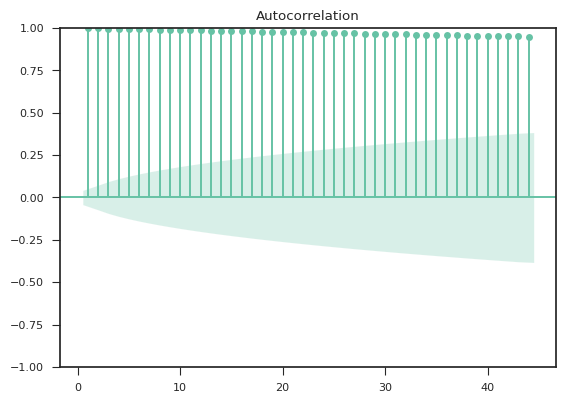

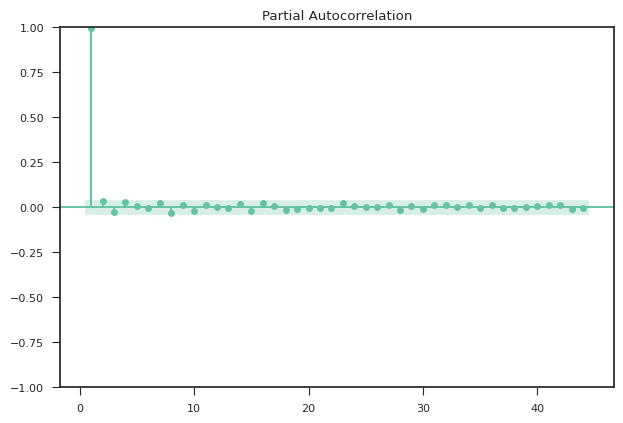

In [351]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

acf = sgt.plot_acf(serie, lags = 44, zero=False)
pacf = sgt.plot_pacf(serie, lags = 44, zero=False)

plt.tight_layout()
plt.show()

In [352]:
print('Série',adfuller(serie))

Série (-0.6832127130183092, 0.8510500385090524, 9, 2149, {'1%': -3.433396592961799, '5%': -2.8628858719817356, '10%': -2.5674864760910148}, -9036.82055894761)


In [353]:
volat = serie.pct_change().dropna()

In [354]:
display(volat.head())
display(volat.tail())

,PORT11
Date,
2015-01-05,-0.006708
2015-01-06,-0.009705
2015-01-07,0.014271
2015-01-08,0.010233
2015-01-09,-0.019241


,PORT11
Date,
2023-10-09,0.001839
2023-10-10,-0.005556
2023-10-11,0.003955
2023-10-13,-0.006595
2023-10-16,0.002009


<Figure size 800x600 with 0 Axes>

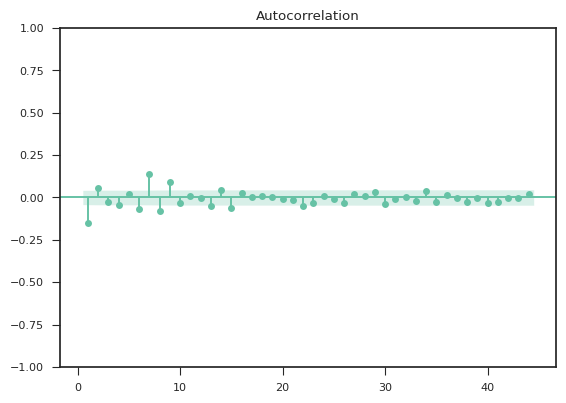

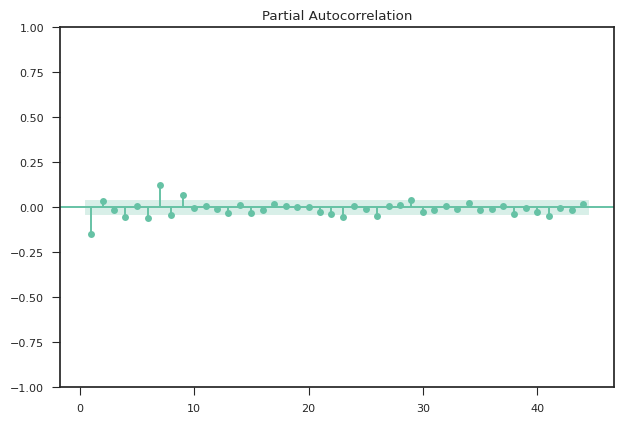

In [355]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

acf = sgt.plot_acf(volat, lags = 44, zero=False)
pacf = sgt.plot_pacf(volat, lags = 44, zero=False)

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

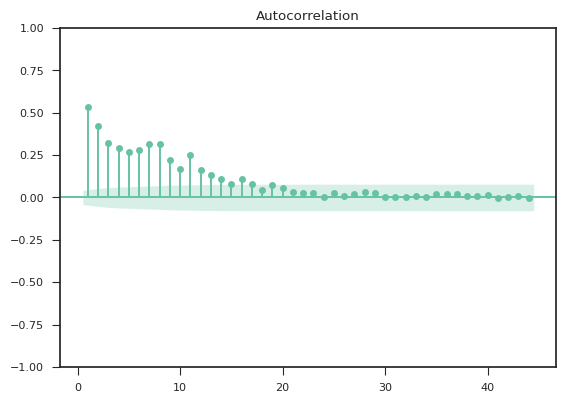

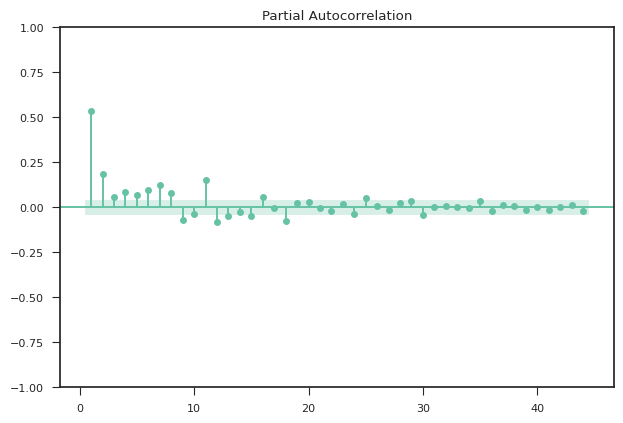

In [356]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(8,6))

acf = sgt.plot_acf(volat**2, lags = 44, zero=False)
pacf = sgt.plot_pacf(volat**2, lags = 44, zero=False)

plt.tight_layout()
plt.show()

In [357]:
print('Série',adfuller(volat))

Série (-14.600695865006049, 4.170568907555761e-27, 8, 2149, {'1%': -3.433396592961799, '5%': -2.8628858719817356, '10%': -2.5674864760910148}, -13137.589343533964)


### Inferência

In [421]:
tscv = TimeSeriesSplit(n_splits=5)

In [422]:
def timeseries_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    return X_train, X_test, y_train, y_test

In [423]:
serie['LAG1'] = serie['PORT11'].shift(1)
serie['LAG2'] = serie['PORT11'].shift(2)

In [424]:
y = serie.dropna()['PORT11']
X = serie.drop(['PORT11'], axis=1)

In [425]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [380]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [391]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    prediction = model.predict(X_test)
    plt.style.use('seaborn-paper')
    plt.figure(figsize=(8,6))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train,
                                    cv=tscv,
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")

    plt.grid(axis='y', linestyle='-', alpha=0.5)

    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    plt.gca().set_axisbelow(True)

    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean Absolute Percentage Error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [383]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression()

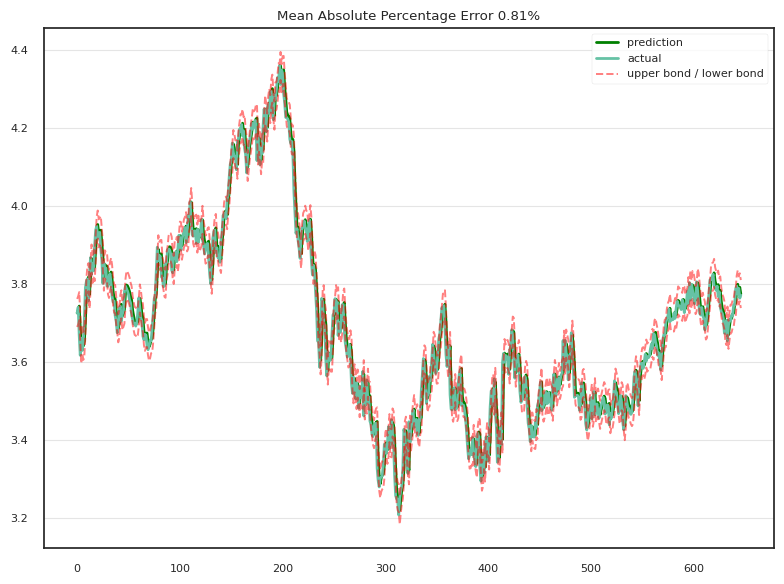

In [392]:
plotModelResults(LinearModel, plot_intervals=True)

## 8° BackTest Carteira

In [530]:
carteira_backtest = carteira.dropna()
carteira_backtest.head()

,BOVA11.SA,IVVB11.SA,SMAL11.SA
Date,,,
2015-01-02,47.259998,55.799999,52.020000
2015-01-05,46.320000,55.750000,50.549999
2015-01-06,46.580002,54.849998,50.000000
2015-01-07,48.150002,55.169998,51.250000
2015-01-08,48.509998,55.799999,52.000000


In [531]:
carteira_backtest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2157 entries, 2015-01-02 to 2023-10-16
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BOVA11.SA  2157 non-null   float64
 1   IVVB11.SA  2157 non-null   float64
 2   SMAL11.SA  2157 non-null   float64
dtypes: float64(3)
memory usage: 67.4 KB


In [532]:
weights = {'BOVA11.SA': 0.2987, 'IVVB11.SA': 0.6962, 'SMAL11.SA': 0.0051}

In [533]:
strategy = bt.Strategy(
    'Rebalance Mensal',
    [bt.algos.RunMonthly(), bt.algos.SelectAll(), bt.algos.WeighSpecified(**weights), bt.algos.Rebalance()]
)

In [534]:
backtest = bt.Backtest(strategy, carteira_backtest)

In [535]:
resultados = bt.run(backtest)

In [536]:
resultados.display()

Stat                 Rebalance Mensal
-------------------  ------------------
Start                2015-01-01
End                  2023-10-16
Risk-free rate       0.00%

Total Return         303.56%
Daily Sharpe         1.03
Daily Sortino        1.69
CAGR                 17.20%
Max Drawdown         -29.11%
Calmar Ratio         0.59

MTD                  1.49%
3m                   1.25%
6m                   9.25%
YTD                  8.12%
1Y                   12.90%
3Y (ann.)            6.22%
5Y (ann.)            15.15%
10Y (ann.)           -
Since Incep. (ann.)  17.20%

Daily Sharpe         1.03
Daily Sortino        1.69
Daily Mean (ann.)    17.81%
Daily Vol (ann.)     17.35%
Daily Skew           -0.02
Daily Kurt           16.17
Best Day             11.07%
Worst Day            -10.31%

Monthly Sharpe       1.26
Monthly Sortino      2.70
Monthly Mean (ann.)  17.26%
Monthly Vol (ann.)   13.71%
Monthly Skew         0.16
Monthly Kurt         1.07
Best Month           15.84%
Worst Month   

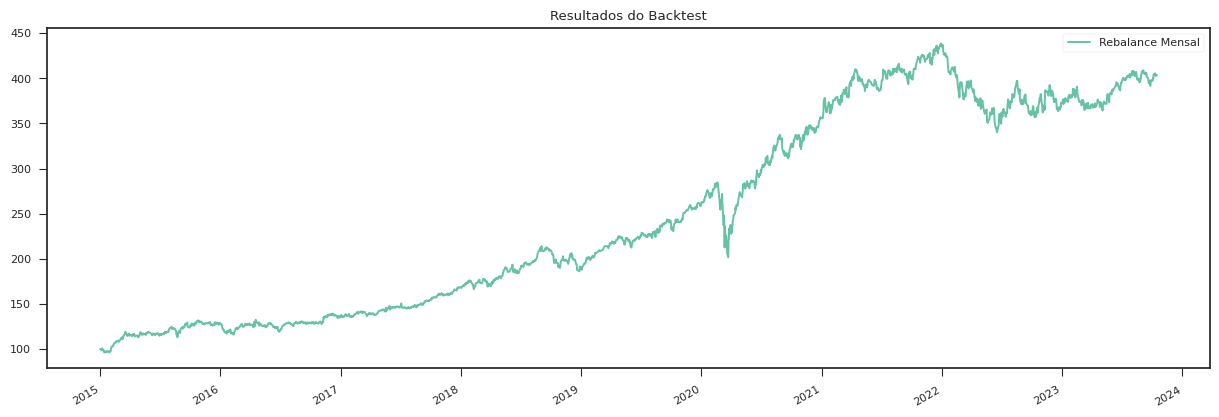

In [537]:
resultados.plot(title="Resultados do Backtest")
plt.show()

In [540]:
retorno_cum.iloc[-1] * 100

240.21685356200447